## ProblemStatement:
You are the datascientist at a telecom company named “Neo” whoes customers are churning out to its competitors. You have to analyze the data of your company and find insights and stop your customers from churning out to other telecom companies.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_style(style = 'dark')

In [4]:
df = pd.read_csv("customer_churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


TasksToBePerformed: 
1) DataManipulation: 
- Extract the 5th column and store it in ‘customer_5’ 
- Extract the 15th column and store it in ‘customer_15’ 
- Extract all the male senior citizens whose payment method is electronic check and store the result in‘senior_male_electronic’ 
- Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than USD100 and store the result in ‘customer_total_tenure’
- Extract all the customers whose contract is of twoyears, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’ 
- Extract 333 random records from the customer_churn data frame and store the result in ‘customer_333’  
- Get the count of different levels from the ‘Churn’ column

In [8]:
#Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:,5]

In [9]:
#Extract the 15th column and store it in ‘customer_15’
customer_15 = df.iloc[:,15]

In [11]:
#Extract all the male senior citizens whose payment method is electronic check and store the result in‘senior_male_electronic’
senior_male_electronic = df.loc[(df['SeniorCitizen'] ==1) & (df['gender'] == 'Male') & (df['PaymentMethod'] == 'Electronic check')]

In [13]:
#Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than USD100 and store the result in ‘customer_total_tenure’
customer_total_tenure = df.loc[(df['tenure'] >70) | (df['MonthlyCharges'] >100)]

In [16]:
#Extract all the customers whose contract is of twoyears, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes = df.loc[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]

In [18]:
#Extract 333 random records from the customer_churn data frame and store the result in ‘customer_333’
customer_333 = df.sample(333)

In [19]:
#Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

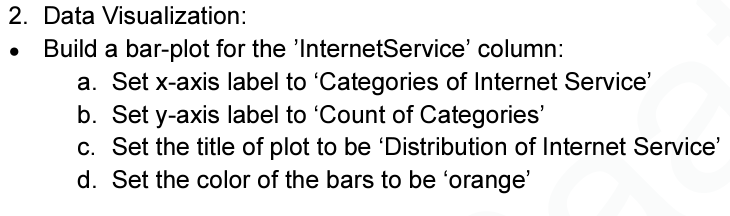

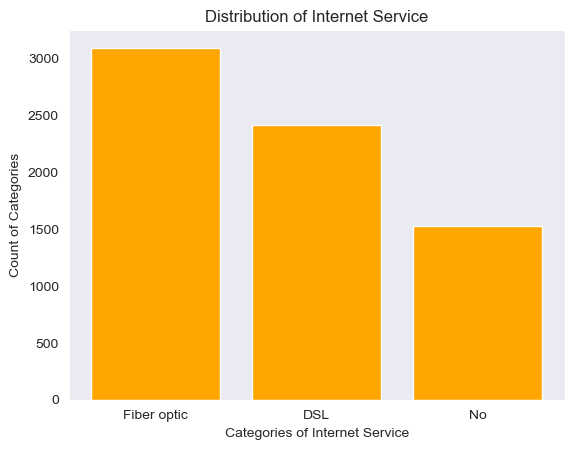

In [31]:
vc = df['InternetService'].value_counts()
plt.bar(x = vc.index, height = vc.values, color = 'orange')
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

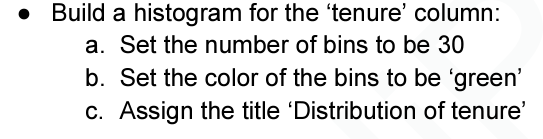

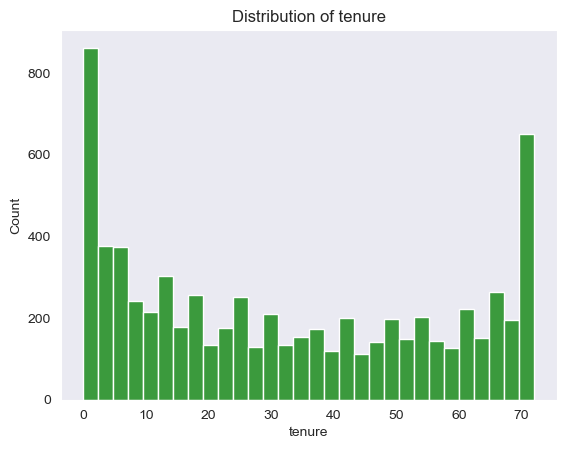

In [33]:
sns.histplot(df['tenure'], bins= 30, color='green')
plt.title("Distribution of tenure")
plt.show()

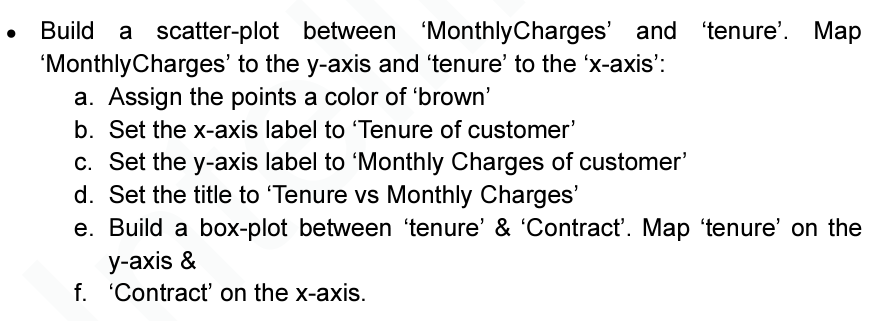

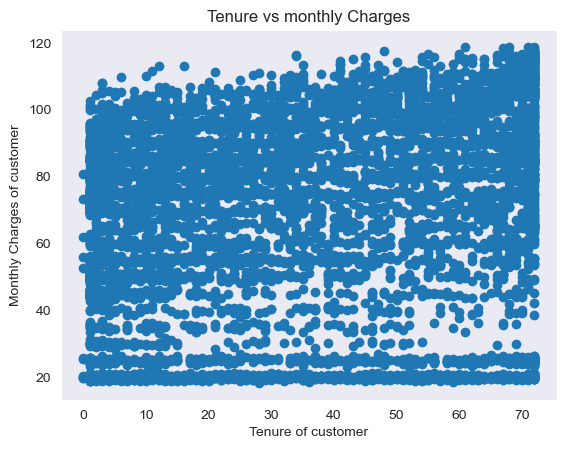

In [36]:
plt.scatter(x = df['tenure'], y = df['MonthlyCharges'])
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs monthly Charges")
plt.show()

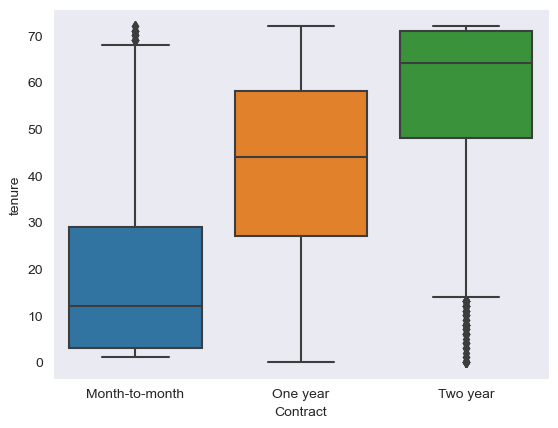

In [38]:
sns.boxplot(x = df['Contract'], y = df['tenure'])
plt.show()

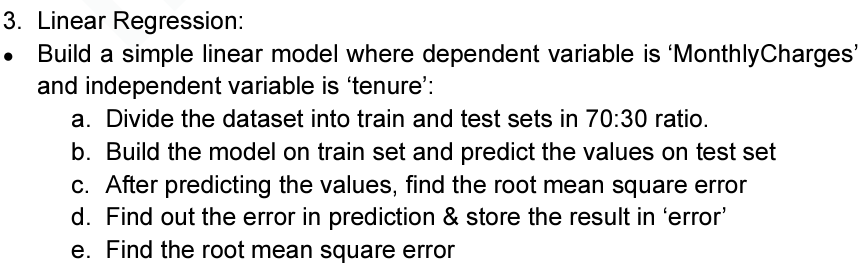

In [39]:
X = df['tenure']
y = df['MonthlyCharges']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred = lin_reg.predict(np.array(X_test).reshape(-1,1))
error = np.sqrt(mean_squared_error(y_test, y_pred))
error

29.07936015646814

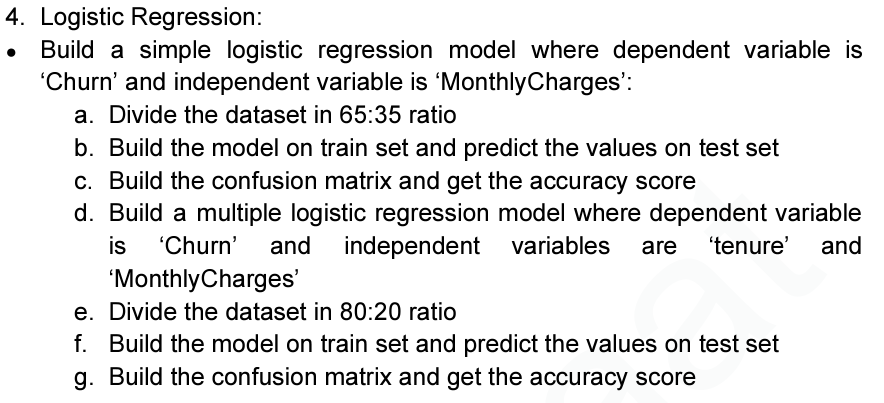

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X = df['MonthlyCharges']
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.35,
                                                   random_state=42)

lr_simple = LogisticRegression()
lr_simple.fit(np.array(X_train).reshape(-1,1), y_train)
y_pred_lr_s = lr_simple.predict(np.array(X_test).reshape(-1,1))
cm = confusion_matrix(y_test, y_pred_lr_s)
accuracy = accuracy_score(y_test, y_pred_lr_s)

print(f"Accuracy of simple logistic regression model is: {accuracy}", "\nConfusion matrix of simple logistic regression model is:", f"\n{cm}")

Accuracy of simple logistic regression model is: 0.7287104622871047 
Confusion matrix of simple logistic regression model is: 
[[1797    0]
 [ 669    0]]


In [69]:
X1 = df.loc[:, ['tenure', 'MonthlyCharges']]
y1 = df['Churn']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,
                                                   test_size=0.2,
                                                   random_state=42)

lr_multiple = LogisticRegression()
lr_multiple.fit(X_train1, y_train1)
y_pred_lr_m = lr_multiple.predict(X_test1)
cm1 = confusion_matrix(y_test1, y_pred_lr_m)
accuracy1 = accuracy_score(y_test1, y_pred_lr_m)

print(f"Accuracy of multiple logistic regression model is: {accuracy1}", "\nConfusion matrix of multiple logistic regression model is:", f"\n{cm1}")

Accuracy of multiple logistic regression model is: 0.7977288857345636 
Confusion matrix of multiple logistic regression model is: 
[[944  92]
 [193 180]]


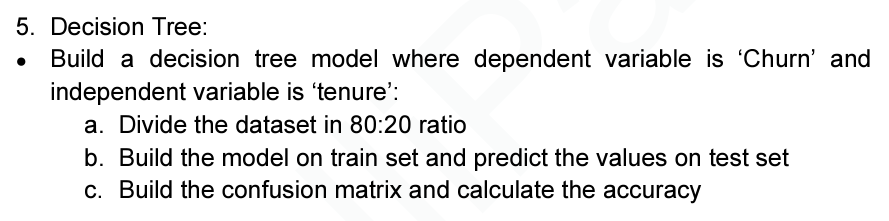

In [71]:
from sklearn.tree import DecisionTreeClassifier

x = df['tenure']
y = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2,
                                                   random_state=42)

tree = DecisionTreeClassifier()
tree.fit(np.array(x_train).reshape(-1,1),y_train)
tree_pred = tree.predict(np.array(x_test).reshape(-1,1))

cm2 = confusion_matrix(y_test, tree_pred)
accuracy2 = accuracy_score(y_test, tree_pred)

print(f"Accuracy of Decision tree classifier model is: {accuracy2}", "\nConfusion matrix of Decision tree classifier model is:", f"\n{cm2}")

Accuracy of Decision tree classifier model is: 0.7572746628814763 
Confusion matrix of Decision tree classifier model is: 
[[951  85]
 [257 116]]


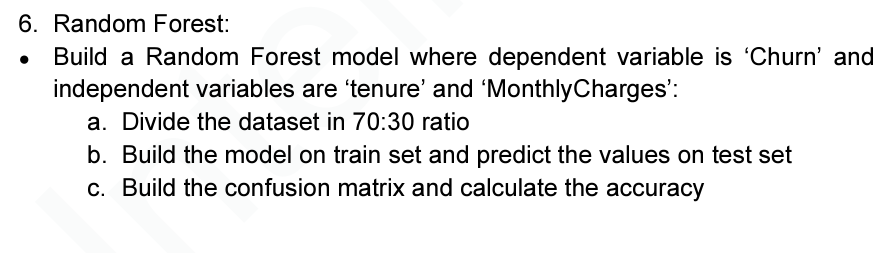

In [73]:
from sklearn.ensemble import RandomForestClassifier

indp = df.loc[:, ['tenure', 'MonthlyCharges']]
dep = df['Churn']

i_train, i_test, d_train, d_test = train_test_split(indp, dep,
                                                   test_size= 0.3,
                                                   random_state=42)

clf = RandomForestClassifier()
clf.fit(i_train, d_train)
pred = clf.predict(i_test)

cm3 = confusion_matrix(d_test, pred)
accuracy3 = accuracy_score(d_test, pred)

print(f"Accuracy of Random Forest classifier model is: {accuracy3}", "\nConfusion matrix of Random Forest classifier model is:", f"\n{cm3}")

Accuracy of Random Forest classifier model is: 0.7529578797917653 
Confusion matrix of Random Forest classifier model is: 
[[1329  210]
 [ 312  262]]
